### An anomaly in cab tip percentages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#### Read the data ... it will take a while ... it is a 2G file

In [5]:
!ls

nyc-cab-tips-exercise.ipynb
pandas-heisman-exercise.ipynb
pandas-movielens-pivot-table-exercise.ipynb
pandas-tennis-data.ipynb
tennis-data.txt
trip_fare_1.csv.gz
u.data
u.item
u.user


In [2]:
fare = pd.read_csv('trip_fare_1.csv.gz', header=0)

In [7]:
fare.head().T

,0,1,2,3,4
medallion,89D227B655E5C82AECF13C3F540D4CF4,0BD7C8F5BA12B88E0B67BED28BEA73D8,0BD7C8F5BA12B88E0B67BED28BEA73D8,DFD2202EE08F7A8DC9A57B02ACB81FE2,DFD2202EE08F7A8DC9A57B02ACB81FE2
hack_license,BA96DE419E711691B9445D6A6307C170,9FD8F69F0804BDB5549F40E9DA1BE472,9FD8F69F0804BDB5549F40E9DA1BE472,51EE87E3205C985EF8431D850C786310,51EE87E3205C985EF8431D850C786310
vendor_id,CMT,CMT,CMT,CMT,CMT
pickup_datetime,2013-01-01 15:11:48,2013-01-06 00:18:35,2013-01-05 18:49:41,2013-01-07 23:54:15,2013-01-07 23:25:03
payment_type,CSH,CSH,CSH,CSH,CSH
fare_amount,6.5,6,5.5,5,9.5
surcharge,0,0.5,1,0.5,0.5
mta_tax,0.5,0.5,0.5,0.5,0.5
tip_amount,0,0,0,0,0
tolls_amount,0,0,0,0,0


In [8]:
fare.columns

Index(['medallion', ' hack_license', ' vendor_id', ' pickup_datetime',
       ' payment_type', ' fare_amount', ' surcharge', ' mta_tax',
       ' tip_amount', ' tolls_amount', ' total_amount'],
      dtype='object')

#### For convenience lets remove the white space in column names

In [10]:
fare.columns = [col.strip() for col in fare.columns]
fare.columns

Index(['medallion', 'hack_license', 'vendor_id', 'pickup_datetime',
       'payment_type', 'fare_amount', 'surcharge', 'mta_tax', 'tip_amount',
       'tolls_amount', 'total_amount'],
      dtype='object')

In [11]:
len(fare)

14776615

In [12]:
fare.set_index(['pickup_datetime'], inplace=True)

In [13]:
fare.drop(['medallion', 'hack_license'], axis=1, inplace=True)

In [14]:
fare.columns

Index(['vendor_id', 'payment_type', 'fare_amount', 'surcharge', 'mta_tax',
       'tip_amount', 'tolls_amount', 'total_amount'],
      dtype='object')

In [15]:
fare.head()

,vendor_id,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
pickup_datetime,,,,,,,,
2013-01-01 15:11:48,CMT,CSH,6.5,0.0,0.5,0.0,0.0,7.0
2013-01-06 00:18:35,CMT,CSH,6.0,0.5,0.5,0.0,0.0,7.0
2013-01-05 18:49:41,CMT,CSH,5.5,1.0,0.5,0.0,0.0,7.0
2013-01-07 23:54:15,CMT,CSH,5.0,0.5,0.5,0.0,0.0,6.0
2013-01-07 23:25:03,CMT,CSH,9.5,0.5,0.5,0.0,0.0,10.5


## Calculate the percentage tip and plot a histogram

In [18]:
fare['tip%'] = round(fare.tip_amount / fare.fare_amount * 100, 0)
fare['tip%'] = fare['tip%'].astype(int)
fare[fare['tip%'] > 0].head()

,vendor_id,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,tip%
pickup_datetime,,,,,,,,,
2013-01-13 04:36:00,VTS,CRD,12.0,0.5,0.5,1.75,0.0,14.75,15
2013-01-13 04:37:00,VTS,CRD,12.0,0.5,0.5,3.12,0.0,16.12,26
2013-01-13 04:41:00,VTS,CRD,5.5,0.5,0.5,1.20,0.0,7.70,22
2013-01-13 04:37:00,VTS,CRD,11.0,0.5,0.5,2.00,0.0,14.00,18
2013-01-13 04:30:00,VTS,CRD,18.0,0.5,0.5,3.70,0.0,22.70,21


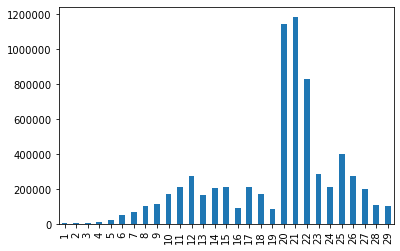

In [26]:
fare['tip%'].value_counts().sort_index()[1:30].plot(kind='bar')

## What anomaly do you notice?

In [ ]:
# fare.sample(100).head()

In [27]:
fare['payment_type'].value_counts()

CRD    7743844
CSH    6982383
NOC      32783
DIS      11171
UNK       6434
Name: payment_type, dtype: int64

In [28]:
fare['vendor_id'].value_counts()

CMT    7450899
VTS    7325716
Name: vendor_id, dtype: int64

In [29]:
crd=fare[fare['payment_type']=='CRD']

In [30]:
len(crd)

7743844

## How is each company charging?

In [32]:
crd['option_1'] = crd.tip_amount / crd.fare_amount

crd['option_2'] = crd.tip_amount / (crd.fare_amount + crd.surcharge)

crd['option_3'] = crd.tip_amount / (crd.fare_amount - crd.tip_amount)


In [33]:
crd=crd.round({'option_1':3,  'option_2':3, 'option_3':3})

In [34]:
c1000= crd.sample(1000, random_state=7)

In [35]:
c1000_cmt = c1000[c1000['vendor_id']=='CMT']

In [36]:
c1000_vts = c1000[c1000['vendor_id']=='VTS']

In [37]:
len(c1000_cmt), len(c1000_vts)

(477, 523)

In [38]:
c1000_cmt[['vendor_id','tip_amount', 'option_1',  'option_2', 'option_3']]

,vendor_id,tip_amount,option_1,option_2,option_3
pickup_datetime,,,,,
2013-01-03 09:02:38,CMT,1.00,0.154,0.154,0.182
2013-01-06 02:04:44,CMT,1.00,0.062,0.061,0.067
2013-01-23 15:22:49,CMT,1.00,0.100,0.100,0.111
2013-01-20 11:38:17,CMT,4.50,0.205,0.205,0.257
2013-01-31 16:44:49,CMT,1.00,0.087,0.080,0.095
...,...,...,...,...,...
2013-01-27 10:50:09,CMT,1.00,0.222,0.222,0.286
2013-01-09 18:01:12,CMT,3.00,0.286,0.261,0.400
2013-01-22 21:16:22,CMT,2.85,0.335,0.317,0.504


In [39]:
c1000_vts[['vendor_id','tip_amount', 'option_1', 'option_2', 'option_3']]

,vendor_id,tip_amount,option_1,option_2,option_3
pickup_datetime,,,,,
2013-01-15 10:06:00,VTS,1.00,0.182,0.182,0.222
2013-01-12 04:20:00,VTS,3.60,0.206,0.200,0.259
2013-01-26 19:12:00,VTS,4.88,0.250,0.250,0.334
2013-01-03 16:38:00,VTS,1.00,0.143,0.125,0.167
2013-01-18 19:19:00,VTS,0.00,0.000,0.000,0.000
...,...,...,...,...,...
2013-01-13 14:30:00,VTS,1.10,0.200,0.200,0.250
2013-01-31 18:20:00,VTS,6.00,0.316,0.300,0.462
2013-01-27 23:07:00,VTS,2.60,0.208,0.200,0.263
